## 数据读取

In [114]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%atplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [115]:
df = pd.read_csv('python_jobs_all_format.csv')
df.head()

job_name                                         job_stars  \
0  (急聘) python爬虫开发工程师  五险一金,餐补补贴,住房补贴,专业培训,绩效奖金,年底双薪,弹性工作,员工旅游,定期体检,下午茶   
1  急招软件测试（双休+会python）                     五险一金,年终奖金,团建活动,员工旅游,专业培训,弹性工作   
2         Python开发工程师              周末双休,带薪年假,五险一金,绩效奖金,节日福利,餐饮补贴,补充医疗保险   
3  python开发 (职位编号：06)                                    五险一金,餐饮补贴,交通补贴   
4         Python实施工程师                                              绩效奖金   

             job_category                                    job_description  \
0       Python开发工程师,软件工程师                                                NaN   
1                 软件测试工程师  岗位职责：,1、根据用户需求规格说明书，确定测试目标，制定测试计划，并完成测试用例编写；,2...   
2  Python开发工程师,技术支持/维护工程师  岗位职责：,1、了解数通网络设备，了解业界主流网络产品，熟悉网络管理工具；,2、了解路由器数...   
3             Python开发工程师  岗位职责：,负责数据库，数据处理和算法方面的工作,需求描述：,1.近3年从事python开发...   
4                      其他  CIM DATABASE是德国CONTACT 软件公司的大型数据管理及过程协同系统，是德国软...   

    company_name company_type company_size        company_industry  \
0     成都指玩科技有限公司         民营公司        少于50人         文字媒体/出版机械/设备/重工   
1  深圳市德科信息技术有限公司           合资   1000-5000人  计算机软件计算机服务(系统、数据服务、维修)   
2       赛尔网络有限公司           国企    500-1000人    互联网/电子商务通信/电信运营、增值服务   
3  深圳市网新新思软件有限公司         民营公司   1000-5000人       计算机服务(系统、数据服务、维修)   
4   上海熠格信息技术有限公司         民营公司        少于50人                   计算机软件   

                                company_introduction  min_salary  max_salary  \
0                                         成都指玩科技有限公司      4000.0      8000.0   
1  【公司简介】德科信息的愿景：成为科技服务行业的领跑者。德科信息的使命：帮助客户成功、帮助员工...     10000.0     15000.0   
2  赛尔网络有限公司成立于2000年12月，经教育部批准，负责中国教育和科研计算机网CERNET...      8000.0     10000.0   
3  浙大网新 www.insigma.com.cn （上证600797）创立于2001年9月，是...     15000.0     20000.0   
4  上海熠格信息技术有限公司是德国CONTACT公司PDM/PLM产品在国内的官方合作伙伴，我们...      8000.0     10000.0   

   mid_salary   place exp_years education  
0      6000.0  深圳-南山区      无需经验        大专  
1     12500.0  广州-天河区      2年经验        本科  
2      9000.0  北京-海淀区      2年经验        本科  
3     17500.0  上海-徐汇区    8-9年经验        大专  
4      9000.0  上海-闵行区      2年经验        本科

In [19]:
df.shape

(12210, 15)

In [20]:
df.isnull().sum()

job_name                   0
job_stars               1892
job_category               1
job_description         1221
company_name               0
company_type               4
company_size              87
company_industry           0
company_introduction       0
min_salary                 7
max_salary                 7
mid_salary                 7
place                      0
exp_years                311
education                462
dtype: int64

In [21]:
df.isnull().sum()/df.count()

job_name                0.000000
job_stars               0.183369
job_category            0.000082
job_description         0.111111
company_name            0.000000
company_type            0.000328
company_size            0.007176
company_industry        0.000000
company_introduction    0.000000
min_salary              0.000574
max_salary              0.000574
mid_salary              0.000574
place                   0.000000
exp_years               0.026137
education               0.039326
dtype: float64

In [29]:
# 检查其它数据
df['company_name'].unique().shape

(9543,)

In [23]:
df['job_name'].unique().shape

(6400,)

In [24]:
df['job_category'].unique().shape

(1894,)

In [25]:
df['company_industry'].unique().shape

(1005,)

In [31]:
df['place'].str.startswith('广州').sum()

1374

 - 6400职位名，9543公司名，12210条数据

## 数据可视化

### 1.公司类型

In [34]:
type_sr = df['company_type'].value_counts()

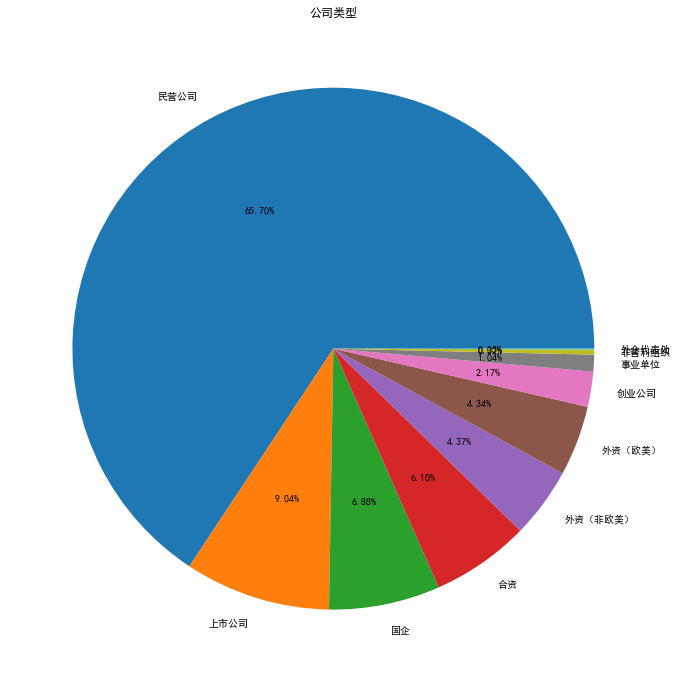

In [36]:
type_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("公司类型")
plt.ylabel('')
plt.savefig('python_all_company_type.png', dpi=300, bbox_inches='tight')

In [37]:
df[df['company_type'] == '上市公司']['company_type'].count()

1103

 - 在全国两周的Python职位数据中，12210个职位有9%，1103家上市公司。

### 2.公司规模

In [38]:
size_sr = df['company_size'].value_counts()

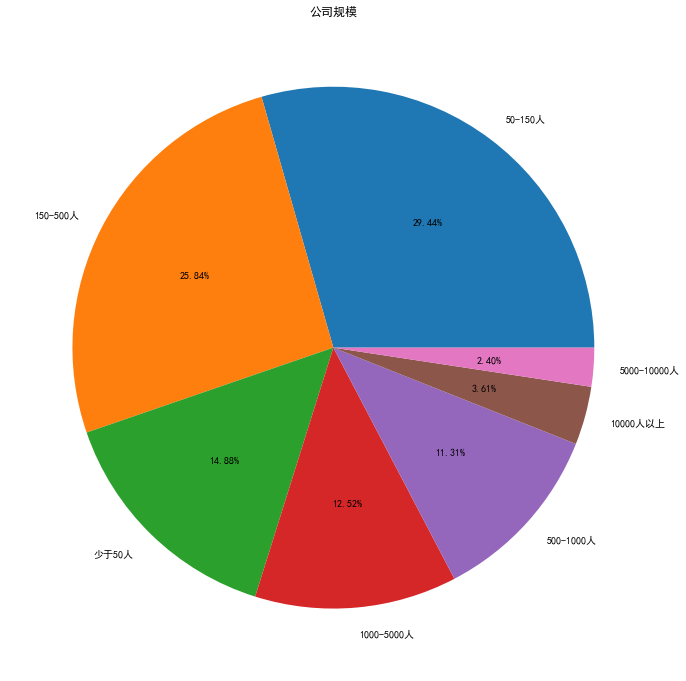

In [39]:
size_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("公司规模")
plt.ylabel('')
plt.savefig('python_all_company_size.png', dpi=300, bbox_inches='tight')

In [40]:
# 少于500人公司的比例
less_500 = df['company_size'].str.contains('少于50人|50-150人|150-500人').mean()
less_500

0.7015590200445434

In [41]:
# 大于500人公司的比例
1 - less_500

0.2984409799554566

 - 在全国两周的Pytho职位数据中，一半多的公司在50-150人和150-500人之间。

### 3.公司规模

In [116]:
df['place']=df['place'].str[:2]

In [117]:
place_sr = df['place'].value_counts()

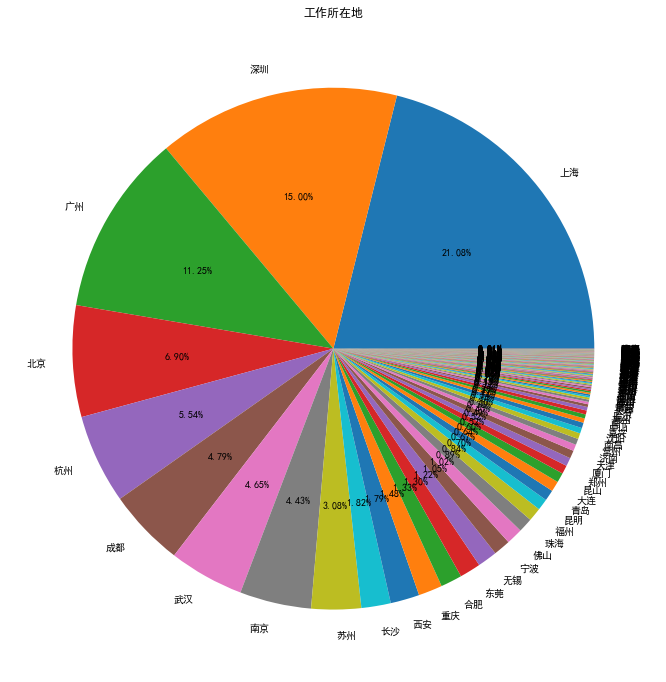

In [118]:
place_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作所在地")
plt.ylabel('')
plt.savefig('python_all_job_place.png', dpi=300, bbox_inches='tight')

In [123]:
# 核心城市工作数量比例
core_7 = df['place'].str.contains('北京|上海|广州|深圳|成都|武汉|南京').mean()
core_7

0.680999180999181

In [119]:
# 核心城市工作数量比例
core_9 = df['place'].str.contains('北京|上海|广州|深圳|杭州|成都|武汉|南京|苏州').mean()
core_9

0.7671580671580671

In [120]:
place_sr_9 = df[df['place'].str.contains('北京|上海|广州|深圳|杭州|成都|武汉|南京|苏州')]

In [121]:
place_sr_9=place_sr_9['place'].value_counts()

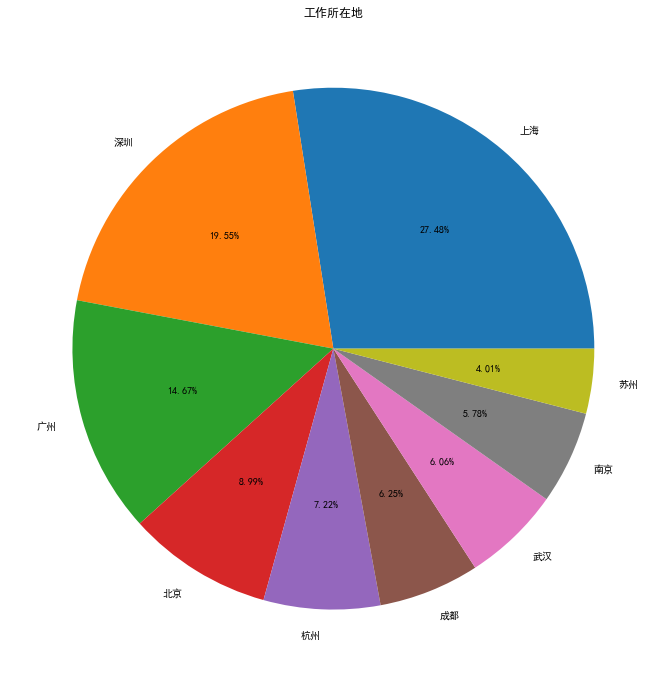

In [122]:
place_sr_9.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作所在地")
plt.ylabel('')
plt.savefig('python_all9_job_place.png', dpi=300, bbox_inches='tight')

In [48]:
# 核心城市工作数量比例
core_4 = df['place'].str.contains('北京|上海|广州|深圳').mean()
core_4

0.5422604422604422

In [75]:
place_sr_4 = df[df['place'].str.contains('北京|上海|广州|深圳')]

In [76]:
place_sr_4=place_sr_4['place'].value_counts()

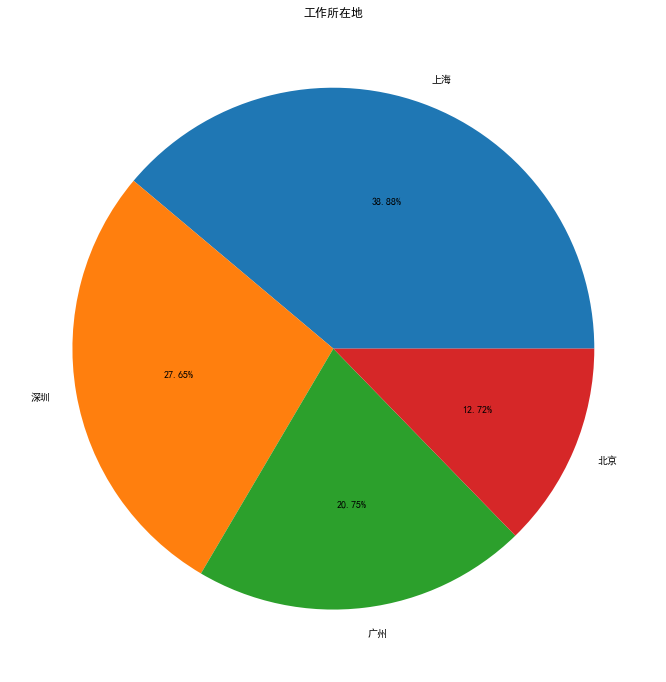

In [77]:
place_sr_4.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作所在地")
plt.ylabel('')
plt.savefig('python_all4_job_place.png', dpi=300, bbox_inches='tight')

 - 在全国两周的Pytho职位数据中，广深地区的职位点两国34%。

### 4.工作经验要求

In [79]:
exp_sr = df['exp_years'].value_counts()

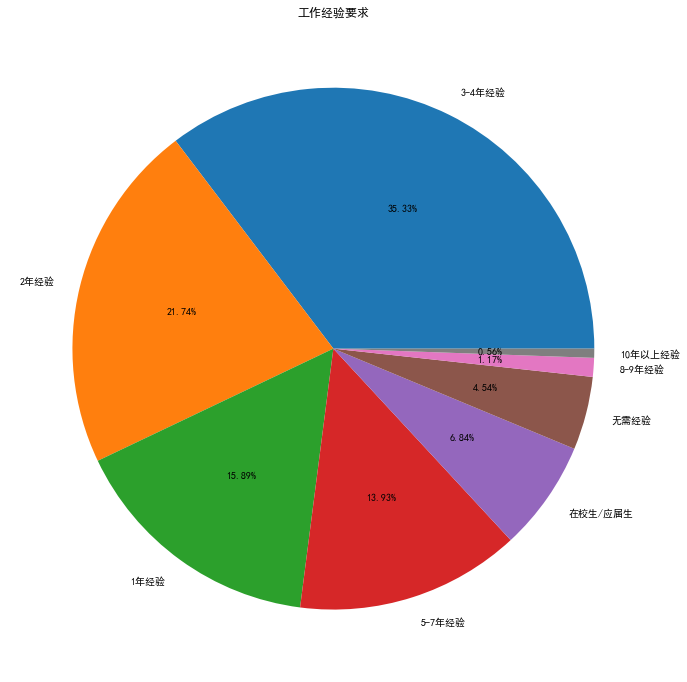

In [80]:
exp_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作经验要求")
plt.ylabel('')
plt.savefig('python_all_exp_years.png', dpi=300, bbox_inches='tight')

In [81]:
# 写无需经验的，其实内含都有一个经验要求
# 1-2年的占比
year2 = df['exp_years'].str.contains('1年经验|2年经验').mean()
year2

0.3763341457265316

In [82]:
# 1-4年的占比
year4 = df['exp_years'].str.contains('1年经验|2年经验|3-4年经验').mean()
year4

0.7296411463148164

 - 在全国两周的Pytho职位数据中，如果工作经验有2年则达到了38%工作的要求，如果工作经验有3年则达到73%工作的要求
 - 所以通过学习两门微专业，在面试时声称自己的经验有3年是必要的

### 5.学历要求

In [83]:
edu_sr = df['education'].value_counts()

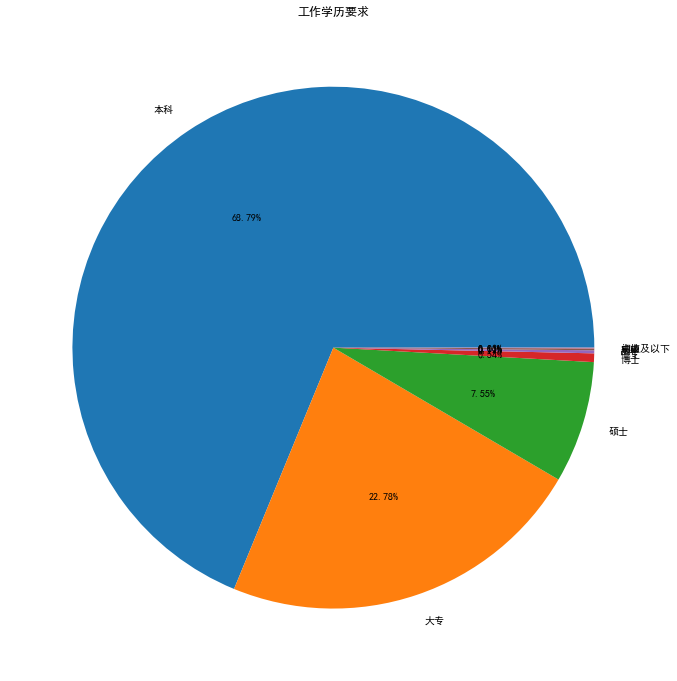

In [84]:
edu_sr.plot.pie(figsize=(12, 12), autopct='%.2f%%')
plt.title("工作学历要求")
plt.ylabel('')
plt.savefig('python_all_edu_require.png', dpi=300, bbox_inches='tight')

 - 在全国两天的Python职位数据中，如果有本科学历则达到91%的职位要求。

### 6.中位薪酬

In [85]:
# 中位薪酬的平均数
df['mid_salary'].mean()

14425.186101778252

In [86]:
# 中位薪酬的最大值
df['mid_salary'].max()

300000.0

In [87]:
# 中位薪酬的最小值
df['mid_salary'].min()

1500.0

In [88]:
# 中位薪酬的中位数
df['mid_salary'].median()

12500.0

In [89]:
# 中位薪酬的众数
df['mid_salary'].mode()[0]

12500.0

<AxesSubplot:>

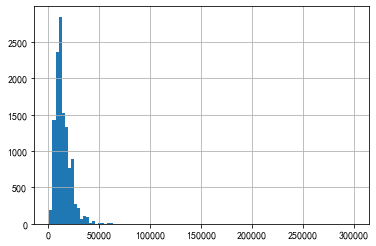

In [90]:
df['mid_salary'].hist(bins=100)

In [91]:
# 离散数据处理
df[df['mid_salary'] > 40000] = 40000

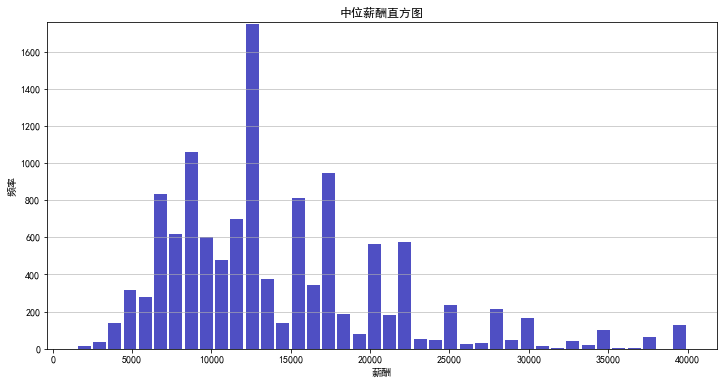

In [92]:
#  matplotlib.axes.Axes.hist() 方法的接口
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(x=df['mid_salary'],
                            bins=40,
                            color='#0504aa',
                            alpha=0.7,
                            rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('薪酬')
plt.ylabel('频率')
plt.title('中位薪酬直方图')

# 设置y轴的上限
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('python_all_salary_hist.png', dpi=300, bbox_inches='tight')

 - 薪酬在后台设置中有几个默认区间的，这导致通过区间最高薪酬最低薪酬计算出来的中位薪酬形成几个跳增点，分别是13000元、17000元、22000元。
 - 根据自己的能力和面试情况，谈薪酬可以这样跳动价格13000、15000、18000、20000、22000、25000元。

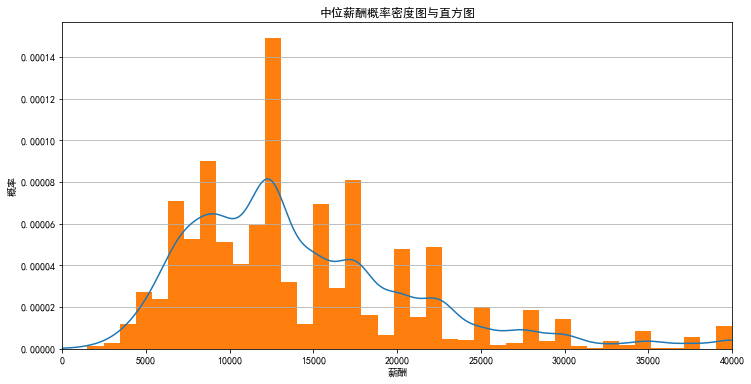

In [93]:
fig, ax = plt.subplots(figsize=(12, 6))
df['mid_salary'].plot.kde(ax=ax, legend=False, title='中位薪酬概率密度图与直方图')
df['mid_salary'].plot.hist(density=True, ax=ax, bins=40)
ax.set_ylabel('概率')
ax.set_xlabel('薪酬')
ax.set_xlim([0, 40000])
ax.grid(axis='y')
fig = plt.gcf()
fig.savefig('python_all_salary_kde.png', dpi=300, bbox_inches='tight')

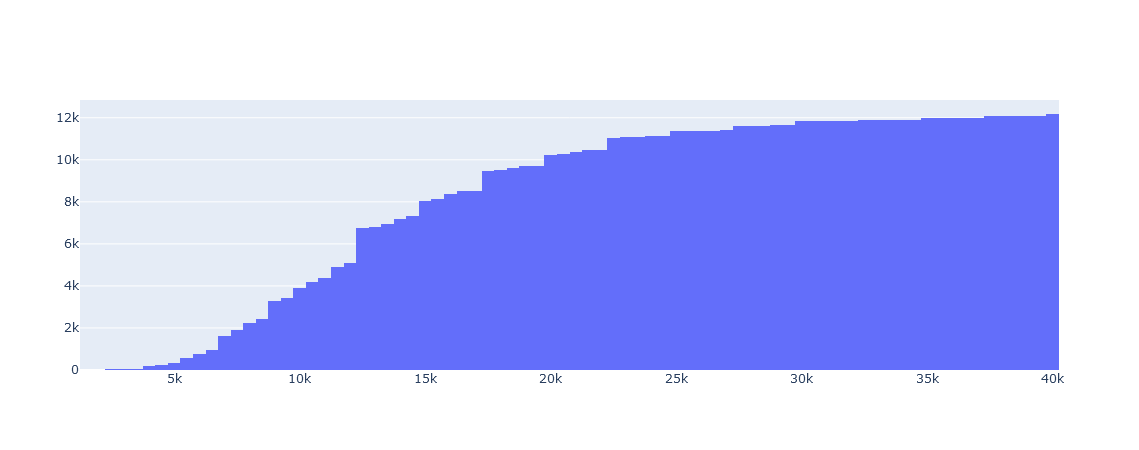

In [94]:
import plotly.graph_objs as go
from plotly.offline import iplot
h = go.Histogram(
    x=df['mid_salary'],
    cumulative_enabled=True,
)
iplot([h])

 - 工资如果有15K，则超过66%的工作的薪酬
 - 工资如果有18K，则超过78%的工作的薪酬
 - 工资如果有20K，则超过84%的工作的薪酬

## 职位描述关键词分析

### 1.中文部分

In [5]:
# 读取为停用词集合
def get_stopwords(path):
    stopwords = set()
    f = open(path, encoding='utf-8')
    while True:
        word = f.readline()
        if word == '':
            break
        stopwords.add(word[:-1])


#     print(stopwords)
    return stopwords

In [6]:
# 将列表中转换为字符串
jd_list = df['job_description'].values.tolist()
jd_all = ''
for i in range(len(jd_list)):
    jd_all += str(jd_list[i]).strip()

In [97]:
# 使用jieba分词，并获得词频排列列表
import jieba.analyse
result = jieba.analyse.textrank(jd_all,
                                topK=200,
                                withWeight=True,
                                allowPOS=['n', 'v', 'a'])

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Articuly\AppData\Local\Temp\jieba.cache
Loading model cost 1.001 seconds.
Prefix dict has been built successfully.


In [98]:
# 关键词中删除停用词
keywords = {}
for k in result:
    keywords[k[0]] = k[1]  # 把列表里的二元组形成字典
stopwords = get_stopwords(r'./job_stopwords.txt')
# print('before delete stopword:', keywords)
keywords = {x: keywords[x] for x in keywords if x not in stopwords}
print('after delete stopword:', keywords)

after delete stopword: {'数据': 0.7914296250428281, '技术': 0.66558084169191, '系统': 0.5984251002615819, '项目': 0.5774865814302427, '产品': 0.543084133267355, '业务': 0.42007338409135864, '学习': 0.4049684496566895, '团队': 0.39770017273115404, '算法': 0.3843934053393657, '沟通': 0.3648998129731448, '需求': 0.3549953052709579, '编写': 0.2791337730968934, '运维': 0.262384262131857, '熟练': 0.2532501876430782, '数据库': 0.24610174486589637, '软件': 0.24503061438946666, '维护': 0.23616187605075295, '文档': 0.2084731192233657, '计算机': 0.2072640453393751, '流程': 0.206663348424234, '工具': 0.20133903971741304, '编程': 0.19343020282265877, '独立': 0.1906720148675159, '行业': 0.18584503598956556, '包括': 0.17679977724610366, '解决': 0.17484941745617869, '性能': 0.17307613242781958, '较强': 0.1704106159224981, '客户': 0.16895016262837875, '架构': 0.16250662409260802, '方案': 0.1614503304520718, '框架': 0.16129585299014665, '网络': 0.1603244213402111, '模型': 0.15182937712905378, '员工': 0.15109983281811296, '语言': 0.14649549878774207, '代码': 0.14112532732888788,

In [23]:
def make_wordcloud(keywords, stopwords, path):
    from wordcloud import WordCloud
    wordcloud = WordCloud(font_path='simhei.ttf',
                          background_color='white',
                          max_font_size=80,
                          stopwords=stopwords)
    word_frequence = keywords
    myword = wordcloud.fit_words(word_frequence)
    plt.figure(figsize=(20, 15))
    plt.axis('off')
    plt.imshow(myword)
    plt.savefig(path, dpi=300, bbox_inches='tight')

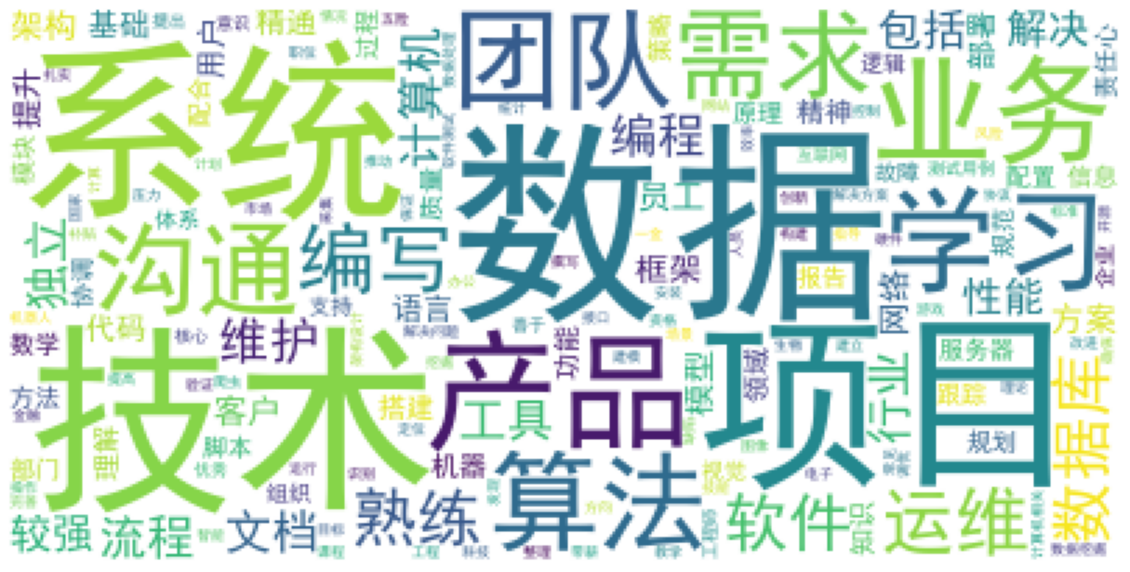

In [100]:
make_wordcloud(keywords=keywords, stopwords=stopwords, path='python全国职位中文词云.png')

In [101]:
with open('python全国职位中文关键词权重.txt', 'w') as f:
    for k, v in keywords.items():
        f.write('{0} {1:.2f}%\n'.format(k, v * 100))

### 2.英文部分

In [54]:
def find_unchinese(str):
    # 去除中文字符
    pattern = re.compile(r'[\u4e00-\u9fa5]+')
    unchinese = re.sub(pattern, "", str)
    # 去除中文标点
    unchinese = re.sub(
        r'[＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。]',
        ' ', unchinese)
    # 去除网页空格符
    unchinese = unchinese.replace('\xa0', ' ')
    # 去除部分英文标点
    unchinese = re.sub(r'[0-9\.,/\\\(\)\?\*-=%~]', ' ', unchinese)
    #     print(unchinese)
    return unchinese

In [55]:
# 保留英文字符，并转成小写
en_jd_all = find_unchinese(jd_all)
en_jd_all = en_jd_all.lower()

In [56]:
# 分词，形成列表
import spacy
nlp = spacy.load("en_core_web_sm")

In [57]:
# 字符串超过100万要分割
en_jd_all1=en_jd_all[:800000]
en_jd_all2=en_jd_all[800000:]

第一部分

In [58]:
doc = nlp(en_jd_all1)
keywords_en = doc.text.split()

In [59]:
# 过滤停用词
stopwords = get_stopwords(r'./job_stopwords.txt')
keywords_en = [x for x in keywords_en if x not in stopwords]

In [60]:
# 统计关键词频率
from collections import Counter
counter = Counter(keywords_en)
keywords_en_count1 = counter.most_common(100)
print(keywords_en_count1)

[('python', 4603), ('c', 2560), ('linux', 2128), ('java', 1825), ('mysql', 1314), ('sql', 1209), ('shell', 1064), ('web', 862), ('oracle', 605), ('redis', 591), ('php', 490), ('hadoop', 459), ('tcp', 427), ('perl', 410), ('spark', 408), ('r', 397), ('html', 396), ('javascript', 393), ('ip', 392), ('css', 363), ('docker', 347), ('c#', 337), ('nginx', 332), ('js', 328), ('windows', 318), ('mongodb', 312), ('hive', 307), ('http', 300), ('bug', 277), ('excel', 276), ('kafka', 271), ('matlab', 263), ('app', 262), ('vue', 252), ('tensorflow', 249), ('spring', 248), ('git', 246), ('hbase', 232), ('server', 231), ('etl', 217), ('tomcat', 213), ('ai', 204), ('android', 200), ('zabbix', 198), ('jmeter', 193), ('jenkins', 192), ('selenium', 172), ('unix', 166), ('ui', 161), ('react', 161), ('net', 158), ('bi', 155), ('devops', 154), ('api', 144), ('sas', 144), ('h', 143), ('scala', 143), ('es', 139), ('ansible', 138), ('opencv', 137), ('caffe', 137), ('data', 135), ('ruby', 132), ('nodejs', 130),

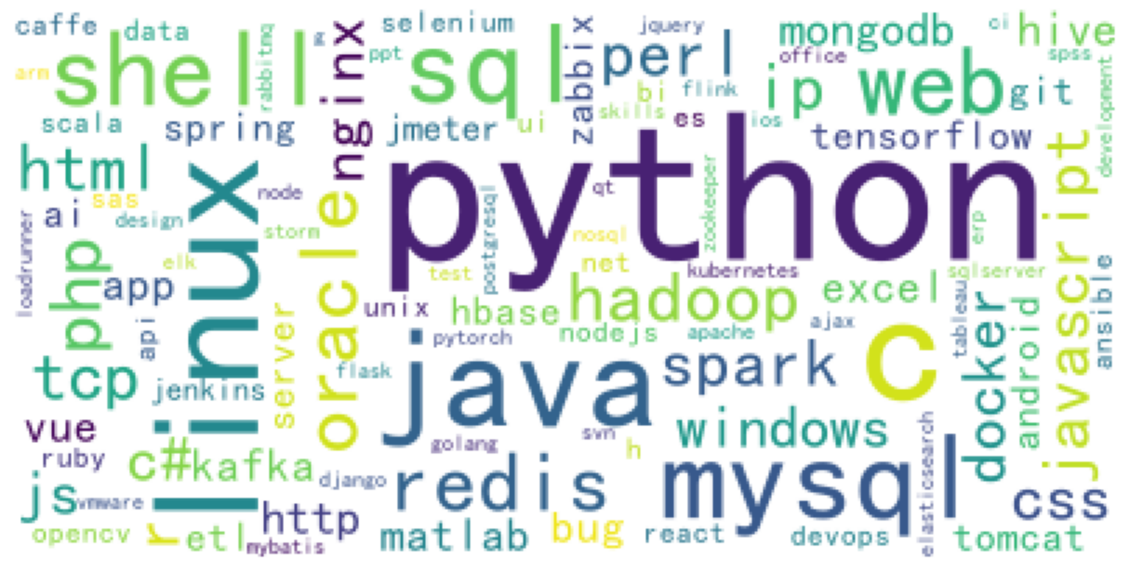

In [61]:
keywords_en_count1 = dict(keywords_en_count1)
make_wordcloud(keywords=keywords_en_count1,
               stopwords=stopwords,
               path='python全国职位英文词云1.png')

In [69]:
with open('python全国职位英文关键词频率1.txt', 'w') as f:
    for k, v in keywords_en_count1.items():
        f.write('{0},{1}\n'.format(k, v))

第二部分

In [63]:
doc = nlp(en_jd_all2)
keywords_en = doc.text.split()

In [64]:
# 统计关键词频率
from collections import Counter
counter = Counter(keywords_en)
keywords_en_count2 = counter.most_common(100)
print(keywords_en_count2)

[('python', 5205), ('c', 2424), ('linux', 2229), ('java', 1684), ('mysql', 1567), ('sql', 1196), ('and', 1115), ('web', 1000), ('shell', 996), ('redis', 722), ('oracle', 591), ('html', 463), ('to', 460), ('nan', 454), ('php', 453), ('hadoop', 426), ('css', 419), ('in', 416), ('mongodb', 416), ('tcp', 409), ('javascript', 404), ('the', 396), ('of', 394), ('django', 388), ('spark', 384), ('docker', 380), ('nginx', 374), ('ip', 374), ('r', 364), ('js', 356), ('http', 352), ('with', 346), ('it', 329), ('git', 329), ('c#', 321), ('perl', 320), ('a', 316), ('k', 305), ('bug', 294), ('windows', 294), ('hive', 287), ('app', 281), ('flask', 278), ('vue', 271), ('s', 261), ('excel', 256), ('．', 244), ('matlab', 243), ('hbase', 241), ('ai', 240), ('go', 238), ('or', 236), ('tensorflow', 235), ('kafka', 234), ('experience', 229), ('d', 229), ('spring', 226), ('tomcat', 226), ('server', 222), ('api', 205), ('etl', 199), ('jenkins', 193), ('for', 189), ('android', 186), ('zabbix', 185), ('opencv', 1

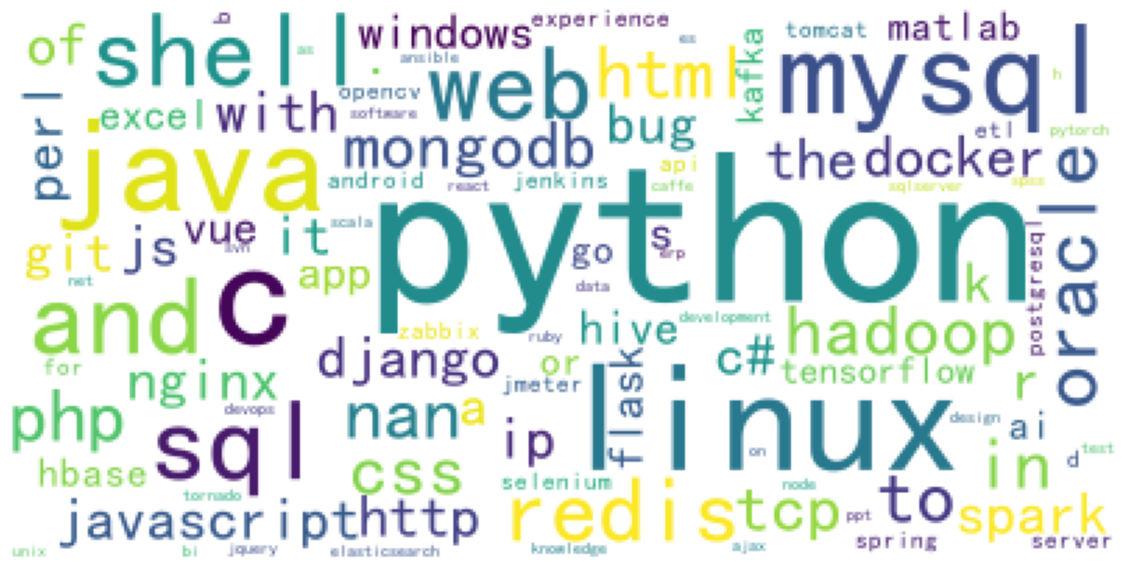

In [65]:
keywords_en_count2 = dict(keywords_en_count2)
make_wordcloud(keywords=keywords_en_count2,
               stopwords=stopwords,
               path='python全国职位英文词云2.png')

In [70]:
with open('python全国职位英文关键词频率2.txt', 'w') as f:
    for k, v in keywords_en_count2.items():
        f.write('{0},{1}\n'.format(k, v))

合并两表

In [101]:
df1=pd.DataFrame({'keywords': list(keywords_en_count1.keys()),
                 'count': list(keywords_en_count1.values())})
df1.head()

keywords  count
0   python   4603
1        c   2560
2    linux   2128
3     java   1825
4    mysql   1314

In [102]:
df2=pd.DataFrame({'keywords': list(keywords_en_count2.keys()),
                 'count': list(keywords_en_count2.values())})
df2.head()

keywords  count
0   python   5205
1        c   2424
2    linux   2229
3     java   1684
4    mysql   1567

In [103]:
df_con=pd.concat([df1, df2], axis=0)

In [110]:
df_con=df_con.groupby('keywords').sum().sort_values(by='count', ascending=False).reset_index()

In [111]:
df_con.head()

keywords  count
0   python   9808
1        c   4984
2    linux   4357
3     java   3509
4    mysql   2881

In [113]:
df_con.to_csv('python全国职位英文关键词频率.csv', index=False)